**code below will calculate METEOR score sentence by sentence**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.translate import meteor_score

# Open the reference and candidate text files
with open('test.txt', 'r') as ref_file, open('w_aug.txt', 'r') as cand_file:
    # Read the contents of the files
    ref_lines = ref_file.readlines()
    cand_lines = cand_file.readlines()

# Open the result file in write mode
with open('meteor_w_aug.txt', 'w') as result_file:
    # Calculate the METEOR score for each line
    for ref_line, cand_line in zip(ref_lines, cand_lines):
        # Tokenize the reference and candidate sentences
        ref_sentences = nltk.sent_tokenize(ref_line)
        cand_sentences = nltk.sent_tokenize(cand_line)

        # Calculate the METEOR score for the entire line
        ref_tokens = []
        for ref_sentence in ref_sentences:
            ref_tokens.extend(nltk.word_tokenize(ref_sentence.lower()))
        cand_tokens = []
        for cand_sentence in cand_sentences:
            cand_tokens.extend(nltk.word_tokenize(cand_sentence.lower()))

        meteor = meteor_score.meteor_score([ref_tokens], cand_tokens)

        # Write the reference, candidate, and METEOR score to the result file
        #result_file.write("Reference: " + ref_line + "\n")
        #result_file.write("Candidate: " + cand_line + "\n")
        result_file.write("" + str(meteor) + "\n")
        #result_file.write("\n")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Code below will calculate CIDEr score sentence by sentence**

In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def read_sentences_from_file(file_path):
    with open(file_path, 'r') as file:
        sentences = file.readlines()
    sentences = [sentence.strip() for sentence in sentences]
    return sentences

def compute_cider_score(generated_sentence, reference_sentences):
    # Preprocess the sentences
    generated_sentence = generated_sentence.lower()
    reference_sentences = [sent.lower() for sent in reference_sentences]

    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Fit the vectorizer on the reference sentences
    vectorizer.fit(reference_sentences)

    # Transform the generated sentence and reference sentences into TF-IDF vectors
    generated_vector = vectorizer.transform([generated_sentence])
    reference_vectors = vectorizer.transform(reference_sentences)

    # Calculate the cosine similarity between the generated vector and reference vectors
    similarities = cosine_similarity(generated_vector, reference_vectors)[0]

    # Compute the CIDEr score as the average cosine similarity
    cider_score = sum(similarities) / len(similarities)
    return cider_score

# Example usage
generated_sentences = read_sentences_from_file("train.txt")
reference_sentences = read_sentences_from_file("test.txt")

output_file = open("cider.txt", "w")
for generated_sentence in generated_sentences:
    cider_score = compute_cider_score(generated_sentence, reference_sentences)
    #output_file.write("Generated Sentence: {}\n".format(generated_sentence))
    #output_file.write("CIDEr score: {}\n".format(cider_score))
    output_file.write("{}\n".format(cider_score))
    #output_file.write("\n")
output_file.close()


**code below will calculate ROUGE score sentence by sentence**

In [ ]:
!pip install rouge

In [ ]:
from rouge import Rouge
import nltk

def calculate_rouge_l_scores(reference_file, hypothesis_file, output_file):
    rouge = Rouge()

    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(hypothesis_file, 'r', encoding='utf-8') as hyp_file, \
         open(output_file, 'w', encoding='utf-8') as out_file:

        ref_sentences = ref_file.readlines()
        hyp_sentences = hyp_file.readlines()

        # Calculate ROUGE-L scores for each sentence and save them in the output file
        for ref_sent, hyp_sent in zip(ref_sentences, hyp_sentences):
            ref_sent = ref_sent.strip()
            hyp_sent = hyp_sent.strip()

            score = rouge.get_scores(hyp_sent, ref_sent)[0]['rouge-l']['f']
            #out_file.write(f"ROUGE-L Score: {score}\n")
            out_file.write(f"{score}\n")

    print(f"ROUGE-L scores saved in {output_file}.")

# Example usage
reference_file = 'test.txt'
hypothesis_file = 'train_w_aug.txt'
output_file = 'rouge1.txt'

calculate_rouge_l_scores(reference_file, hypothesis_file, output_file)


ROUGE-L scores saved in rouge1.txt.


**Code below will calculate NIST score sentence by sentence.**

In [ ]:
import nltk

def calculate_nist_score(ref_sentence, hyp_sentence, n=4):
    ref_tokens = nltk.word_tokenize(ref_sentence)
    hyp_tokens = nltk.word_tokenize(hyp_sentence)

    ref_ngrams = nltk.ngrams(ref_tokens, n)
    hyp_ngrams = nltk.ngrams(hyp_tokens, n)

    ref_ngram_counts = nltk.FreqDist(ref_ngrams)
    hyp_ngram_counts = nltk.FreqDist(hyp_ngrams)

    clipped_counts = {
        ngram: min(hyp_ngram_counts[ngram], ref_ngram_counts[ngram])
        for ngram in hyp_ngram_counts
    }

    numerator = sum(clipped_counts.values())
    denominator = sum(hyp_ngram_counts.values())

    nist_score = numerator / denominator if denominator != 0 else 0.0

    return nist_score

def calculate_sentence_scores(ref_sentences, hyp_sentences):
    sentence_scores = []
    for ref_sentence, hyp_sentence in zip(ref_sentences, hyp_sentences):
        score = calculate_nist_score(ref_sentence, hyp_sentence)
        sentence_scores.append(score)
    return sentence_scores

nltk.download('punkt')

# Read reference sentences from a text file
with open('test.txt', 'r', encoding='utf-8') as ref_file:
    ref_sentences = ref_file.readlines()

# Read hypothesis sentences from a text file
with open('train.txt', 'r', encoding='utf-8') as hyp_file:
    hyp_sentences = hyp_file.readlines()

# Calculate sentence scores
scores = calculate_sentence_scores(ref_sentences, hyp_sentences)

# Save sentence scores in a text file
with open('nist.txt', 'w', encoding='utf-8') as scores_file:
    for score in scores:
        scores_file.write(str(score) + '\n')

print("Sentence scores saved in scores.txt file.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sentence scores saved in scores.txt file.


**Code below will calculate the BLEU score sentence by sentence**

In [ ]:
!pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 1.4 MB/s eta 0:00:00


In [ ]:
!pip install sacremoses

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 4.6 MB/s eta 0:00:00


**sentence by sentence BLEU score**

In [ ]:
import nltk
from nltk.translate import bleu_score

def calculate_sentence_bleu(reference, candidate):
    reference = [nltk.word_tokenize(sentence) for sentence in reference]
    candidate = nltk.word_tokenize(candidate)
    return bleu_score.sentence_bleu(reference, candidate)

def calculate_and_save_bleu_scores(reference_file, candidate_file, output_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file, \
         open(output_file, 'w', encoding='utf-8') as out_file:

        reference_sentences = [line.strip() for line in ref_file.readlines()]
        candidate_sentences = [line.strip() for line in can_file.readlines()]

        for ref_sentence, can_sentence in zip(reference_sentences, candidate_sentences):
            bleu_score = calculate_sentence_bleu([ref_sentence], can_sentence)
            out_file.write(f"BLEU Score: {bleu_score:.4f} - Reference: {ref_sentence} - Candidate: {can_sentence}\n")

if __name__ == "__main__":
    reference_file_path = "test.txt"
    candidate_file_path = "train_wo_aug.txt"
    output_file_path = "bleu.txt"

    calculate_and_save_bleu_scores(reference_file_path, candidate_file_path, output_file_path)

    print("BLEU scores saved to:", output_file_path)


**for Urdu Text, calculating sentece wise BLEU score.**

In [ ]:
!pip install nltk

BLEU score based on custom tokenization.

In [ ]:
from nltk.translate import bleu_score

def calculate_word_overlap_bleu(reference, candidate):
    reference_tokens = reference.split()  # Tokenize based on spaces
    candidate_tokens = candidate.split()

    # Calculate BLEU score
    word_overlap_bleu = bleu_score.sentence_bleu([reference_tokens], candidate_tokens, weights=(1, 0, 0, 0))

    return word_overlap_bleu

def calculate_and_save_bleu_scores(reference_file, candidate_file, output_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file, \
         open(output_file, 'w', encoding='utf-8') as out_file:

        reference_sentences = [line.strip() for line in ref_file.readlines()]
        candidate_sentences = [line.strip() for line in can_file.readlines()]

        for ref_sentence, can_sentence in zip(reference_sentences, candidate_sentences):
            word_overlap_bleu = calculate_word_overlap_bleu(ref_sentence, can_sentence)
            out_file.write(f"{word_overlap_bleu:.4f}\n")

if __name__ == "__main__":
    reference_file_path = "test.txt"
    candidate_file_path = "w_aug.txt"
    output_file_path = "bleu_w_aug.txt"

    calculate_and_save_bleu_scores(reference_file_path, candidate_file_path, output_file_path)

    print("Word Overlap BLEU scores saved to:", output_file_path)


Word Overlap BLEU scores saved to: bleu_w_aug.txt


**Make two txt files. One with reference and otherone as translation of neural model.**

In [ ]:
!python3 compute-bleu-sentence-args.py test.txt train_w_aug.txt

In [ ]:
!rm bleu*

rm: cannot remove 'sample_data': Is a directory


**create compute-bleu-sentence-args.py file and copy code given below in it.**

In [ ]:
# BLEU for segment by segment with arguments
# Run this file from CMD/Terminal
# Example Command: python3 compute-bleu-sentence-args.py test_file_name.txt mt_file_name.txt

import sys
import sacrebleu
from sacremoses import MosesDetokenizer
md = MosesDetokenizer(lang='en')

target_test = sys.argv[1]  # Test file argument
target_pred = sys.argv[2]  # MTed file argument

# Open the test dataset human translation file and detokenize the references
refs = []

with open(target_test) as test:
    for line in test:
        line = line.strip().split()
        line = md.detokenize(line)
        refs.append(line)

print("Reference 1st sentence:", refs[0])

# Open the translation file by the NMT model and detokenize the predictions
preds = []

with open(target_pred) as pred:
    for line in pred:
        line = line.strip().split()
        line = md.detokenize(line)
        preds.append(line)

# Calculate BLEU for sentence by sentence and save the result to a file
with open("bleu-" + target_pred + ".txt", "w+") as output:
    for line in zip(refs,preds):
        test = line[0]
        pred = line[1]
        print(test, "\t--->\t", pred)
        bleu = sacrebleu.sentence_bleu(pred, [test], smooth_method='exp')
        print(bleu.score, "\n")
        output.write(str(bleu.score) + "\n")

**Drawing histogram of BLEU scores**

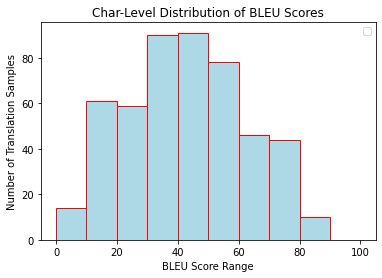

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

f= np.loadtxt('bleu-unlex-char.txt', unpack='False')

# set bins' interval for your data
# You have following intervals:
# 1st col is number of data elements in [0,10000);
# 2nd col is number of data elements in [10000, 20000);
# ...
# last col is number of data elements in [100000, 200000];
bins = [0,10,20,30,40,50,60,70,80,90,100]

plt.hist(f, histtype='bar', bins = bins, color = "lightblue", ec="red")
plt.xlabel('BLEU Score Range')
plt.ylabel('Number of Translation Samples')
plt.title('Char-Level Distribution of BLEU Scores')
plt.legend()
plt.show()

**for word-score**

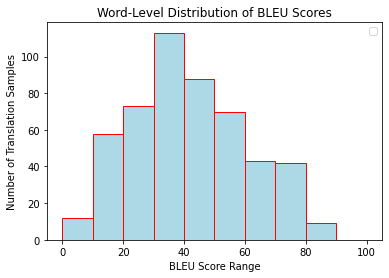

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

f= np.loadtxt('bleu-unlex-word.txt', unpack='False')

# set bins' interval for your data
# You have following intervals:
# 1st col is number of data elements in [0,10000);
# 2nd col is number of data elements in [10000, 20000);
# ...
# last col is number of data elements in [100000, 200000];
bins = [0,10,20,30,40,50,60,70,80,90,100]

plt.hist(f, histtype='bar', bins = bins, color = "lightblue", ec="red")
plt.xlabel('BLEU Score Range')
plt.ylabel('Number of Translation Samples')
plt.title('Word-Level Distribution of BLEU Scores')
plt.legend()
plt.show()

**code to read text and save in excel file**

In [ ]:
with open('unlexical-word.txt') as f1:
    lines = [line.rstrip() for line in f1]

with open('test.txt') as f2:
    lines2 = [line.rstrip() for line in f2]

with open('bleu-unlex-word.txt') as f3:
    lines3 = [line.rstrip() for line in f3]


print(type(lines))
print(type(lines2))
print(type(lines3))


<class 'list'>
<class 'list'>
<class 'list'>


In [ ]:
!pip install pandas
!pip install xlsxwriter

In [ ]:
import pandas as pd
import xlsxwriter

data = {'unlex-word-data': lines}

df = pd.DataFrame(data)

df['test-data'] = lines2
df['BLEU-Scores'] = lines3

print(df)
writer = pd.ExcelWriter('test-word.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Unlex-Word-Data', index=False)
writer.save()

**now, reading excel file to display outputs for low BLEU scores**

In [ ]:
import openpyxl
from pathlib import Path

xlsx_file = Path('', 'test-word.xlsx')
wb_obj = openpyxl.load_workbook(xlsx_file)
sheet = wb_obj.active

col_names = []
for column in sheet.iter_cols(1, sheet.max_column):
    col_names.append(column[0].value)


print(col_names)

In [ ]:
df = pd.read_excel('test-word.xlsx', sheet_name=0) #reads the first sheet of your excel file
print(df)
print(type(df))

In [ ]:
print(len(df.query("`BLEU-Scores` >= 0 and `BLEU-Scores` <= 10")))

print(df.query("`BLEU-Scores` >= 0 and `BLEU-Scores` <= 10"))



12
                                unlex-word-data  \
2                She really like shortest eggs.   
11           Does everyone possibly get a book?   
54                        Who the children are!   
140                     She tore up the secret.   
247                     I went there with feet.   
268                        Has a drop dripping?   
377        She washed him from her performance.   
540            There was a soldier on the ship.   
579  She is donating some money to cancer name.   
589                                       http:   
610                 The rope must be resumed...   
752                      Tom won a lot of race.   

                                     test-data  BLEU-Scores  
2                      She likes short skirts.     9.652435  
11             Nowadays anybody can get books.     6.567275  
54              What a nuisance that child is!     7.160476  
140        She has hit the jackpot once again.     7.654113  
247                    

In [ ]:
print(len(df.query("`BLEU-Scores` >= 11 and `BLEU-Scores` <= 20")))

print(df.query("`BLEU-Scores` >= 11 and `BLEU-Scores` <= 20"))



50
                                   unlex-word-data  \
4                  One cannot live on this island.   
22                The casino is playing money now.   
34                 The piano snapped the fire out.   
51               I think he's eaten about 10 here.   
92                                  The flies wet.   
102                       The room wasn't out yet.   
141                 You're here to speak Georgian.   
150               There is a skeleton in the park.   
155                  I'm wetting my handkerchiefs.   
171                      I'll listen to this song.   
175                        Your shift is open now.   
250                                Tom ripped off.   
262                We fishing in the River Thames.   
263            The law was criticized by the wash.   
277                   There is a bag in this room.   
382                            Four times 5 is 20.   
383             He studied some turtle in Harvard.   
413                      

In [ ]:
print(len(df.query("`BLEU-Scores` >= 21 and `BLEU-Scores` <= 30")))

print(df.query("`BLEU-Scores` >= 21 and `BLEU-Scores` <= 30"))


73
                                       unlex-word-data  \
10   She bought an vacuum cleaner from the supermar...   
28                             How deep the potato is!   
55                 It will cost about 10 thousand yen.   
57           He drank some orange juice from a bottle.   
71                            The children were bored.   
..                                                 ...   
849                             Japanese is my tongue.   
871              Tom escorting Mary from the building.   
876  Salted medical technology was one of the silve...   
884                            The problem is discuss.   
893                                It's a red herring.   

                                             test-data  BLEU-Scores  
10     She bought a vacuum cleaner at the supermarket.    26.084743  
28                              How deep this lake is!    22.957488  
55                      It will cost around 10000 yen.    25.848658  
57              He d

In [ ]:
print(len(df.query("`BLEU-Scores` >= 31 and `BLEU-Scores` <= 40")))

print(df.query("`BLEU-Scores` >= 31 and `BLEU-Scores` <= 40"))


99
                          unlex-word-data  \
9              That stinks of cigarettes.   
20                 The dog snapped at me.   
32   Tom washed the sheets on his finger.   
37          She resigned through my poem.   
39                    Taninna is purring.   
..                                    ...   
864                       Tom is escaped.   
887                No one encouraged him.   
889                            I'm tired.   
894                  Tom sat on his desk.   
897                         Stop sharing!   

                                     test-data  BLEU-Scores  
9                     You stink of cigarettes.    39.763536  
20                       The dog nipped at me.    37.991784  
32   Tom twirled the basketball on his finger.    38.260294  
37                     She scoffed at my poem.    32.466792  
39                          Taninna is paling.    35.355339  
..                                         ...          ...  
864                   

In [ ]:
print(len(df.query("`BLEU-Scores` >= 41 and `BLEU-Scores` <= 50")))

print(df.query("`BLEU-Scores` >= 41 and `BLEU-Scores` <= 50"))


84
                                       unlex-word-data  \
29                    Ted loves his wife to Elizabeth.   
36                                        I'm thirsty.   
40                    The black bird is not blackbird.   
88   Both Cristina and Luis always dreamed of study...   
125                   I can't stand the noise anymore.   
..                                                 ...   
855                                      Tom is happy.   
858                         Latin is a dead name dead.   
863                                No one deserves it.   
866                          He ate name of the apple.   
886                     The bill amounts to 5,000 yen.   

                                             test-data  BLEU-Scores  
29                       Ted loves his wife Elizabeth.    48.892302  
36                                  I'm still thirsty.    45.138644  
40                 That black bird is not a blackbird.    42.383656  
88   Both Cristina a

In [ ]:
print(len(df.query("`BLEU-Scores` >= 51 and `BLEU-Scores` <= 60")))

print(df.query("`BLEU-Scores` >= 51 and `BLEU-Scores` <= 60"))


61
                           unlex-word-data                          test-data  \
24   Susan questioned your father's shoes.  Susan shined your father's shoes.   
31                The piano value is zero.         The default value is zero.   
33          She hired a private detective.  She hired a private investigator.   
42              The train leaves at 2: 30.      The train leaves at 2:30 p.m.   
48                  I am milking my goats.              I am milking my goat.   
..                                     ...                                ...   
783           Mayuko wore a flower smells.        Mayuko wore a flower crown.   
828                           That stinks.                         It stinks.   
856              The baby is crawling now.              The baby is crawling.   
885       I was born on April 3rd in 1950.       I was born on April 3, 1950.   
890              Tom rolled up his sleeve.         Tom rolled up his sleeves.   

     BLEU-Scores  
24   

In [ ]:
print(len(df.query("`BLEU-Scores` >= 61 and `BLEU-Scores` <= 70")))

print(df.query("`BLEU-Scores` >= 61 and `BLEU-Scores` <= 70"))


43
                                       unlex-word-data  \
23   The bathtub frightened when she was talking on...   
91   The official dinner took place in the White Ho...   
97                      I have never climbed Mt. Fuji.   
104                   F. Uranus is similar to Neptune.   
118                            Will you stop babbling?   
123                            She is not a good cook.   
177           Tom couldn't pronounce Mary's last name.   
208                            aircraft is taking off.   
210        They were seated the table in a restaurant.   
212                             I saw nothing strange.   
236                    Nick still owes me ten dollars.   
242               Playing name is my favorite pastime.   
249                        No one lives in this house.   
256                 My little brother asked for money.   
280                        Tom is coming to the party.   
303                      Tom was born in the nineties.   
308        

In [ ]:
print(len(df.query("`BLEU-Scores` >= 71 and `BLEU-Scores` <= 80")))

print(df.query("`BLEU-Scores` >= 71 and `BLEU-Scores` <= 80"))


25
                                       unlex-word-data  \
5    George W. Bush was born in the state Connectic...   
25                             I arrived two days ago.   
30                   Samba is a book by Scott McCloud.   
41                          I painted the house green.   
63                             We chopped a tree down.   
73   The presentation is accompanied with a lot of ...   
99             I took him, but he ignored the warning.   
111                       This plastic chair is cheap.   
178                    The damned computer won't work.   
254                         I've lost my mobile phone.   
258  A typical of prisoners took place on May 24, 1...   
294                         My yogurt expires in 2014.   
351               Mr. Johnson's room was a large room.   
364                                 That CD costs $10.   
476                             AI sat down beside me.   
588                    Rats chewed a hole in the wall.   
659        

In [ ]:
print(len(df.query("`BLEU-Scores` >= 81 and `BLEU-Scores` <= 90")))

print(df.query("`BLEU-Scores` >= 81 and `BLEU-Scores` <= 90"))


3
                                       unlex-word-data  \
335  This dictionary contains about half a million ...   
721                 We got up at seven in the morning.   
851                      six people came to the party.   

                                             test-data  BLEU-Scores  
335  The dictionary contains about half a million w...    86.334002  
721                  I got up at seven in the morning.    86.334002  
851                 Only six people came to the party.    86.687790  


In [ ]:
print(len(df.query("`BLEU-Scores` >= 91 and `BLEU-Scores` <= 100")))

print(df.query("`BLEU-Scores` >= 91 and `BLEU-Scores` <= 100"))


0
Empty DataFrame
Columns: [unlex-word-data, test-data, BLEU-Scores]
Index: []


**removing comments along with DRSs from test.txt file.**

In [ ]:
import re

def remove_comments(input_drs):
    # Remove inline comments
    cleaned_drs = re.sub(r'%[^\n]*', '', input_drs)
    # Remove comments at the beginning of the DRS block (if any)
    cleaned_drs = cleaned_drs.strip()
    return cleaned_drs

def clean_drs_file(input_file, output_file):
    with open(input_file, 'r') as f:
        drs_data = f.read()

    drs_list = drs_data.split('\n\n')  # Assuming DRSs are separated by empty lines in the input file

    cleaned_drs_list = []
    for drs in drs_list:
        cleaned_drs_list.append(remove_comments(drs))

    cleaned_drs_data = '\n\n'.join(cleaned_drs_list)

    with open(output_file, 'w') as f:
        f.write(cleaned_drs_data)

input_file_path = 'input.txt'
output_file_path = 'output_drs.txt'

clean_drs_file(input_file_path, output_file_path)


**calculating chrF score for urdu generation.**

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 5.4 MB/s eta 0:00:00


In [ ]:
from torchmetrics.functional.text import chrf_score

def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.readlines()
    return [line.strip() for line in content]

def calculate_chrf_score(preds_file, target_file):
    # Read content from files
    preds = read_file(preds_file)
    target = read_file(target_file)

    # Calculate chrf score for each line
    chrf_results = [chrf_score([pred], [tar]).item() for pred, tar in zip(preds, target)]

    # Calculate the average chrf score
    average_chrf_score = sum(chrf_results) / len(chrf_results)

    return average_chrf_score

# Replace 'preds.txt' and 'target.txt' with your file names
preds_file = 'gen_aug.txt'
target_file = 'ref.txt'

# Calculate and print the average chrf score
average_chrf_score = calculate_chrf_score(preds_file, target_file)
print(f"Average chrf score: {average_chrf_score}")


Average chrf score: 0.4587372371926904


calculating sentence by sentence score

In [ ]:
from torchmetrics.functional.text import chrf_score

def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.readlines()
    return [line.strip() for line in content]

def calculate_and_save_chrf_scores(preds_file, target_file, output_file):
    # Read content from files
    preds = read_file(preds_file)
    target = read_file(target_file)

    with open(output_file, 'w', encoding='utf-8') as out_file:
        for pred, tar in zip(preds, target):
            # Calculate chrf score for each line
            chrf_score_value = chrf_score([pred], [tar]).item()

            # Save the chrf score to the output file
            out_file.write(f"{chrf_score_value:.4f}\n")

if __name__ == "__main__":
    # Replace 'gen_aug.txt', 'ref.txt', and 'chrF_scores.txt' with your file names
    preds_file = 'train_w_aug.txt'
    target_file = 'test.txt'
    output_file = 'chrF1.txt'

    # Calculate and save the chrF scores sentence by sentence
    calculate_and_save_chrf_scores(preds_file, target_file, output_file)

    print("chrF scores saved to:", output_file)


chrF scores saved to: chrF1.txt


**Calculating BERT-Score**

using automatic way, and sentence by sentence.

In [ ]:
# install pytorch and huggingface transformers if you havn't done so
!pip install torch
!pip install transformers

In [ ]:
# if you have not installed bert_score, it is very easy
# simply uncomment the line below to install through pip
!pip install bert_score

In [ ]:
from bert_score import score

In [ ]:
with open("train_wo_aug.txt") as f:
    cands = [line.strip() for line in f]

with open("test.txt") as f:
    refs = [line.strip() for line in f]

In [ ]:
cands[0]

In [ ]:
# When you are running this cell for the first time,
# it will download the BERT model which will take relatively longer.
# for Urdu, lang="others" and for English, lang="en"
P, R, F1 = score(cands, refs, lang="others", verbose=True)

In [ ]:
F1

In [ ]:
import torch

def save_scores_to_file(scores, output_file):
    with open(output_file, 'w', encoding='utf-8') as out_file:
        for score in scores:
            # Convert the tensor value to a float and save to the output file
            out_file.write(f"{score:.4f}\n")

# Example usage
# Replace 'bert_scores_tensor' and 'bert_scores.txt' with your tensor and desired output file
bert_scores_tensor = F1
# bert_scores_tensor = torch.tensor(copy torch F1 score here)

output_file = 'bert_scores.txt'

# Convert the tensor to a list and save BERT scores line by line to a file
bert_scores_list = bert_scores_tensor.tolist()
save_scores_to_file(bert_scores_list, output_file)


using github directory...

In [ ]:
!git clone https://github.com/Tiiiger/bert_score


Cloning into 'bert_score'...
remote: Enumerating objects: 993, done.
remote: Counting objects: 100% (355/355), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 993 (delta 219), reused 321 (delta 197), pack-reused 638
Receiving objects: 100% (993/993), 1.34 MiB | 8.48 MiB/s, done.
Resolving deltas: 100% (534/534), done.


In [ ]:
cd bert_score


/content/bert_score


In [ ]:
!pip install .

Processing /content/bert_score
  Preparing metadata (setup.py) ... done
  Created wheel for bert-score: filename=bert_score-0.3.13-py3-none-any.whl size=61125 sha256=cc33e1170c9396dca06f28f9239be8ffedc419343510a2c99cf7d6537aa11d7b
  Stored in directory: /tmp/pip-ephem-wheel-cache-4y_6v7wl/wheels/45/60/ae/f2f7d3e86a5863e0c2bfadd900eb5e6678a6cc956a71983310
Successfully built bert-score


In [ ]:
!python -m unittest discover


config.json: 100% 482/482 [00:00<00:00, 1.64MB/s]
vocab.json: 100% 899k/899k [00:00<00:00, 18.4MB/s]
merges.txt: 100% 456k/456k [00:00<00:00, 7.08MB/s]
tokenizer.json: 100% 1.36M/1.36M [00:00<00:00, 56.8MB/s]
model.safetensors: 100% 1.42G/1.42G [00:15<00:00, 93.7MB/s]
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
.Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
.Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.we

for 'Urdu' specifically, we mention multi-lingual BERT model 'bert-base-multilingual-cased'.

In [ ]:
!bert-score -r ../test.txt -c ../train_wo_aug.txt --model bert-base-multilingual-cased

tokenizer_config.json: 100% 29.0/29.0 [00:00<00:00, 134kB/s]
config.json: 100% 625/625 [00:00<00:00, 3.09MB/s]
vocab.txt: 100% 996k/996k [00:00<00:00, 15.7MB/s]
tokenizer.json: 100% 1.96M/1.96M [00:00<00:00, 26.0MB/s]
model.safetensors: 100% 714M/714M [00:06<00:00, 106MB/s]
bert-base-multilingual-cased_L9_no-idf_version=0.3.12(hug_trans=4.35.2)_fast-tokenizer P: 0.854723 R: 0.853493 F1: 0.853797


**calculating COMET score for urdu generation.**

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install unbabel-comet

In [ ]:
!pip install evaluate

In [ ]:
from dataclasses import dataclass
from typing import Optional

import comet  # From: unbabel-comet
import datasets
import torch

import evaluate

In [ ]:
from evaluate import load
#comet_metric = load('metrics/comet/comet.py')
comet_metric = load('comet')
comet_metric = load('comet', 'wmt-large-hter-estimator')
source = ["Dem Feuer konnte Einhalt geboten werden", "Schulen und Kindergärten wurden eröffnet."]
hypothesis = ["The fire could be stopped", "Schools and kindergartens were open"]
reference = ["They were able to control the fire.", "Schools and kindergartens opened"]
predictions = comet_metric.compute(predictions=hypothesis, references=reference, sources=source)
predictions['scores']

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.1.3. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/371e9839ca4e213dde891b066cf3080f75ec7e72/checkpoints/model.ckpt`


In [ ]:
#from comet import comet_score
from evaluate import load
#comet_metric = load('metrics/comet/comet.py')
comet_metric = load('comet')

# Load reference and generated text from files
with open('ref.txt', 'r', encoding='utf-8') as file:
    reference_text = file.read()

with open('ref.txt', 'r', encoding='utf-8') as file:
    generated_text = file.read()

# Calculate COMET score
#score = comet_score(reference_text, generated_text, language='urdu')

#predictions = comet_metric.compute(predictions=hypothesis, references=reference, sources=source)
predictions = comet_metric.compute(predictions=reference_text, references=reference_text, sources=reference_text)
predictions['scores']

#print(f"COMET Score: {score}")


filtering SMATCH data

In [ ]:
def remove_line_numbers(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as infile, \
         open(output_file, 'w', encoding='utf-8') as outfile:
        for line in infile:
            # Split each line at ':' and keep only the part after the colon
            parts = line.split(':')
            if len(parts) == 2:
                try:
                    # Attempt to convert the part after the colon to a float
                    float_value = float(parts[1].strip())
                    outfile.write(f"{float_value:.15f}\n")
                except ValueError:
                    # Handle cases where the conversion to float fails
                    print(f"Warning: Skipping line due to invalid format: {line}")

# Example usage
input_file_path = 'par_w_aug.txt'
output_file_path = 'smatch1.txt'

remove_line_numbers(input_file_path, output_file_path)
